In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:
movies_df = pd.read_csv('rotten_tomatoes_movie_reviews.csv')
reviews_df = pd.read_csv('rotten_tomatoes_movies.csv')

In [3]:
movies_df.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [4]:
data = movies_df[['id','reviewText','scoreSentiment']].copy()
data.loc[data["scoreSentiment"] == "POSITIVE", "scoreSentiment"] = 1
data.loc[data["scoreSentiment"] == "NEGATIVE", "scoreSentiment"] = 0
data = data.dropna()
data



,id,reviewText,scoreSentiment
0,beavers,Timed to be just long enough for most youngste...,1
1,blood_mask,It doesn't matter if a movie costs 300 million...,0
2,city_hunter_shinjuku_private_eyes,The choreography is so precise and lifelike at...,1
3,city_hunter_shinjuku_private_eyes,The film's out-of-touch attempts at humor may ...,0
4,dangerous_men_2015,Its clumsy determination is endearing and some...,1
...,...,...,...
1444958,thor_love_and_thunder,Solid but not totally sold&#44; Thor&#58; Ragn...,1
1444959,thor_love_and_thunder,Thor&#58; Love and Thunder is the most enterta...,1
1444960,thor_love_and_thunder,&quot;Thor&#58; Love and Thunder&quot; is a st...,1
1444961,thor_love_and_thunder,Across Taika Waititi&#8217;s film&#44; a war a...,0


In [5]:
reviews_df.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN


In [6]:
import re
#sp = spacy.load('en_core_web_sm')
#stopwords = sp.Defaults.stop_words
# stopwords |= {"movie","movies","film","story","character","characters","comedy"}
# print(stopwords)
# stopwords.remove('not')

def remove_stopwords(text):
    text_tokens = text.split(" ")
    text_tokens_filtered= [word for word in text_tokens if not word in all_stopwords]
    return (" ").join(text_tokens_filtered)

def clean(text):
#     text = remove_stopwords(text.lower())  # Removing stopwords decreased accuracies, therefore we did not use!!!
    text= re.sub("(\d*\.\d+)|(\d+\.[0-9 ]+)", r'', text.lower())
    text = re.sub(r'@|#', r'', text.lower())     # Returns a string with @-symbols and hashtags removed.
    text = re.sub(r'http.*', r'', text.lower())  # Returns a string with any websites starting with 'http.' removed.
  
    return ' '.join(re.findall(r'\w+', text.lower())) # Returns a string with only English unicode word characters ([a-zA-Z0-9_]).

data['reviewText'] = data['reviewText'].apply(lambda x: clean(x))
data

,id,reviewText,scoreSentiment
0,beavers,timed to be just long enough for most youngste...,1
1,blood_mask,it doesn t matter if a movie costs 300 million...,0
2,city_hunter_shinjuku_private_eyes,the choreography is so precise and lifelike at...,1
3,city_hunter_shinjuku_private_eyes,the film s out of touch attempts at humor may ...,0
4,dangerous_men_2015,its clumsy determination is endearing and some...,1
...,...,...,...
1444958,thor_love_and_thunder,solid but not totally sold 44 thor 58 ragnarok...,1
1444959,thor_love_and_thunder,thor 58 love and thunder is the most entertain...,1
1444960,thor_love_and_thunder,quot thor 58 love and thunder quot is a step u...,1
1444961,thor_love_and_thunder,across taika waititi 8217 s film 44 a war agai...,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.index.values, 
                                                  data.scoreSentiment.values, 
                                                  test_size=0.1, 
                                                  random_state=42, 
                                                  stratify=data.scoreSentiment)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=y_train)
data['data_type'] = ['not_set']*data.shape[0]
data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'val'
data.loc[X_test, 'data_type'] = 'test'
data = data.dropna()
train_set = data[data['data_type'] == 'train'].drop_duplicates(ignore_index=True)
val_set = data[data['data_type'] == 'val'].drop_duplicates(ignore_index=True)
test_set = data[data['data_type'] == 'test'].drop_duplicates(ignore_index=True)
print(test_set)
data = pd.concat([train_set, val_set, test_set], ignore_index=True)
data = data.sample(frac=1, random_state=1).reset_index(drop=True)
data

                                 id  \
0                dangerous_men_2015   
1              small_town_wisconsin   
2                            tejano   
3       1005521-death_of_a_salesman   
4                          la_deuda   
...                             ...   
137447        thor_love_and_thunder   
137448        thor_love_and_thunder   
137449        thor_love_and_thunder   
137450        thor_love_and_thunder   
137451        thor_love_and_thunder   

                                               reviewText scoreSentiment  \
0       will entertain some viewers and infuriate othe...              0   
1       small town wisconsin is always proving itself ...              1   
2       the story itself slithers with twists and turn...              1   
3                              a classic american tragedy              1   
4       a bresson esque movie that is always enigmatic...              1   
...                                                   ...            ...   

,id,reviewText,scoreSentiment,data_type
0,iris_2015,iris could be seen as a primer on how to grow ...,1,train
1,the_diary_of_a_teenage_girl,the diary of a teenage girl isn t as different...,1,train
2,predator,there are some really obnoxious things about p...,1,train
3,charm_city_kings,despite some commendable character work and a ...,0,train
4,verdict_on_auschwitz_the_frankfurt_trial_1963_...,a monumental achievement,1,train
...,...,...,...,...
1368146,america_adrift,lopez s first feature comes across as fragment...,0,train
1368147,kon_tiki_2012,though the modern kon tiki is a dramatization ...,1,train
1368148,in_the_shadow_of_the_moon,this wonderful documentary succeeds as a remin...,1,train
1368149,rise_of_the_planet_of_the_apes,its human characters are ciphers even if the a...,1,train


<AxesSubplot:xlabel='scoreSentiment'>

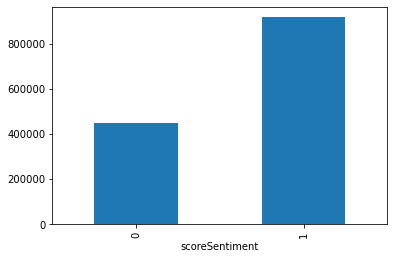

In [8]:
data.groupby("scoreSentiment").scoreSentiment.count().plot.bar(ylim=0)

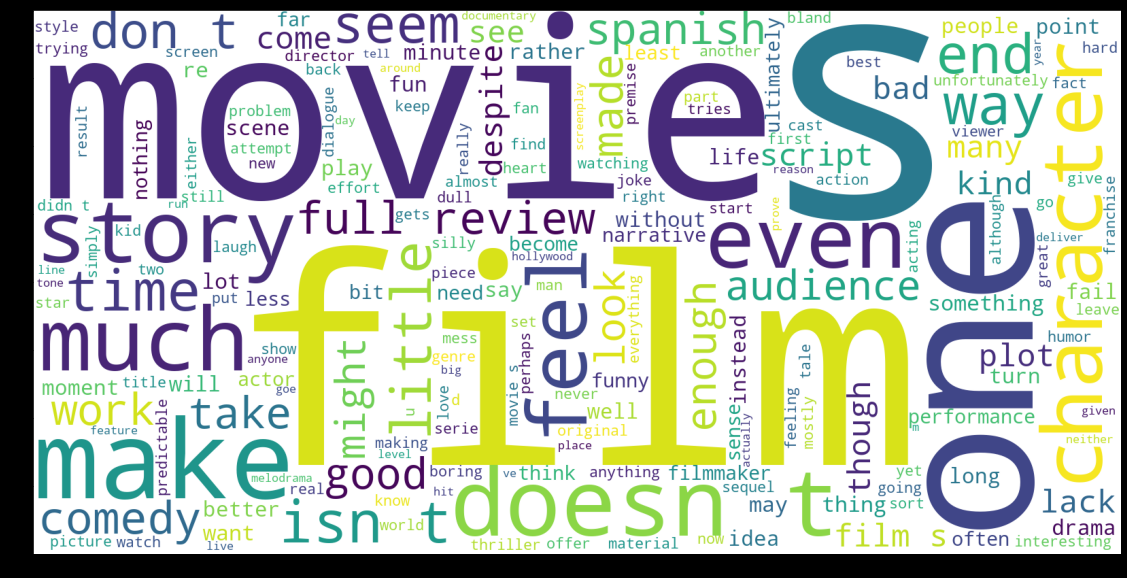

In [9]:
negative = data[data['scoreSentiment'] == 0]
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(negative.reviewText))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)

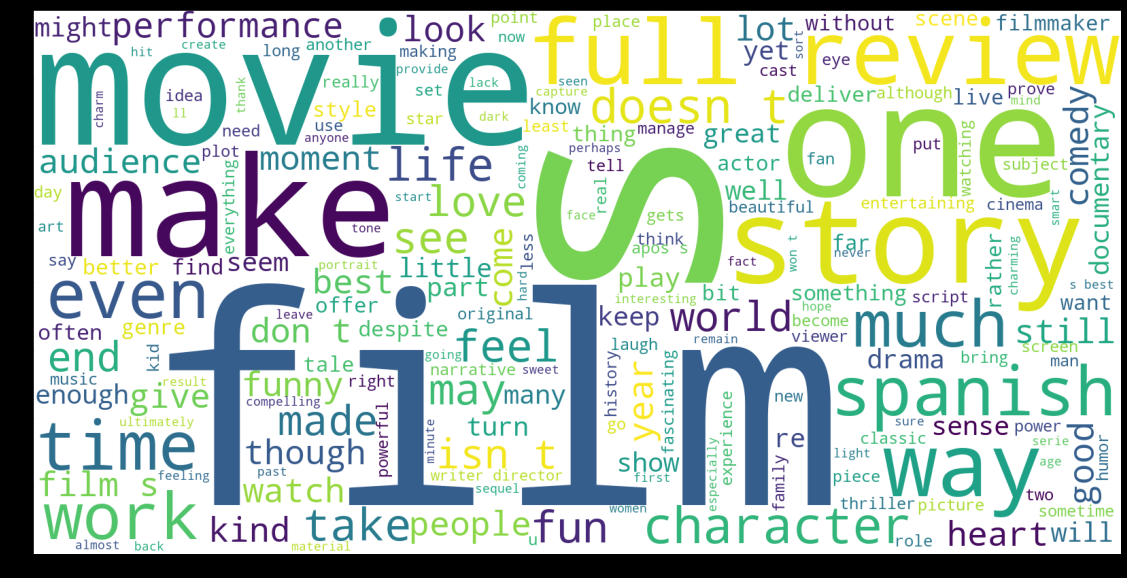

In [10]:
positive = data[data['scoreSentiment'] == 1]
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(positive.reviewText))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train = train_set.reviewText.values
Y_train = train_set.scoreSentiment.values
X_test = test_set.reviewText.values
Y_test = test_set.scoreSentiment.values
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')
target_categories = ["0","1"]
print(X_train)
print(Y_train)



['timed to be just long enough for most youngsters brief attention spans and it s packed with plenty of interesting activity both on land and under the water'
 'it doesn t matter if a movie costs 300 million or only 300 dollars good is good and bad is bad and bloodmask the possession of nicole lameroux is just plain bad'
 'the choreography is so precise and lifelike at points one might wonder whether the movie was rotoscoped but no live action reference footage was used the quality is due to the skill of the animators and kodama s love for professional wrestling'
 ...
 'quot thor 58 love and thunder quot is a step up from quot thor 58 ragnarok quot in terms of exhibition 44 wit 44 emotion 44 and maturity 46'
 'across taika waititi 8217 s film 44 a war against the gods feels like an afterthought to a bad rom com 46'
 'it 8217 s the jokes that make it 44 with the self mocking man mountain chris hemsworth setting the tone and making it fun 44 and natalie portman 44 tessa thompson and the 

  (0, 136627)	0.24306738723720628
  (0, 125120)	0.04935703770366223
  (0, 130893)	0.2072856336924461
  (0, 70475)	0.24263312417605407
  (0, 88369)	0.11055218194225902
  (0, 15707)	0.16934470140052654
  (0, 2348)	0.3013717961189207
  (0, 63254)	0.18603136571391563
  (0, 87813)	0.05876718980184232
  (0, 95287)	0.2123877533150264
  (0, 138495)	0.09336213074583717
  (0, 90579)	0.23888874731767964
  (0, 64424)	0.07447291435182254
  (0, 5528)	0.11275139190521019
  (0, 117182)	0.3326217266628035
  (0, 8828)	0.21671690163013035
  (0, 16667)	0.2630748999221441
  (0, 140224)	0.30406322491520466
  (0, 82286)	0.1414810023092556
  (0, 47101)	0.09878690049019927
  (0, 40262)	0.1592570409795508
  (0, 73507)	0.17385957566878757
  (0, 66509)	0.13977681023828992
  (0, 11610)	0.11429432544484745
  (0, 126504)	0.0687325616172788
  :	:
  (1045206, 56647)	0.24429933587874658
  (1045206, 81102)	0.2386018678779211
  (1045206, 82476)	0.21147872891649022
  (1045206, 22388)	0.19867673944965228
  (1045206, 123151

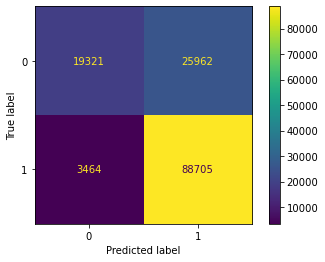

In [13]:
vectorizer = TfidfVectorizer()
tfidf_text = vectorizer.fit_transform(X_train)
print(tfidf_text)
# Training the classifier with Naive Bayes
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
print(nb)
nb.fit(X_train, Y_train)
test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train, Y_train)*100)
test_accuracy = round(accuracy_score(test_predict, Y_test)*100)
print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy))
print()
print(classification_report(test_predict, Y_test, target_names=target_categories))

cm = confusion_matrix(Y_test, test_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()


In [ ]:
dt = Pipeline([('tfidf', TfidfVectorizer()),
                ('dt', DecisionTreeClassifier()),
               ])

dt.fit(X_train, Y_train)
test_predict = dt.predict(X_test)

train_accuracy = round(dt.score(X_train, Y_train)*100)
test_accuracy = round(accuracy_score(test_predict, Y_test)*100)

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy))
print()
print(classification_report(test_predict, Y_test, target_names=target_categories))

cm = confusion_matrix(Y_test, test_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

In [ ]:
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean')),
               ])

knn.fit(X_train, Y_train)
test_predict = knn.predict(X_test)

train_accuracy = round(knn.score(X_train, Y_train)*100)
test_accuracy = round(accuracy_score(test_predict, Y_test)*100)

print("K-Nearest Neighbour Train Accuracy Score : {}% ".format(train_accuracy))
print("K-Nearest Neighbour Test Accuracy Score  : {}% ".format(test_accuracy))
print()
print(classification_report(test_predict, Y_test, target_names=target_categories))

cm = confusion_matrix(Y_test, test_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()


In [ ]:
lr = Pipeline([('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(random_state=42, solver='liblinear')),
               ])

lr.fit(X_train, Y_train)
test_predict = lr.predict(X_test)

train_accuracy = round(lr.score(X_train, Y_train)*100)
test_accuracy = round(accuracy_score(test_predict, Y_test)*100)

print("Logistic Regression Train Accuracy Score : {}% ".format(train_accuracy))
print("Logistic Regression Test Accuracy Score  : {}% ".format(test_accuracy))
print()
print(classification_report(test_predict, Y_test, target_names=target_categories))

cm = confusion_matrix(Y_test, test_predict, labels=[0,1,2,3,4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()